# 项目背景
拼多多是国内主流的手机购物APP，成立于2015年9月，用户通过发起和朋友、家人、邻居等的拼团，以更低的价格，拼团购买商品。拼多多作为新电商开创者,致力于将娱乐社交的元素融入电商运营中,通过“社交+电商”的模式,让更多的用户带着乐趣分享实惠,享受全新的共享式购物体验。对于各大电商平台，在“双十一”这种大促时间段，优惠券会起到非常大的促销作用。那么，如何找到更容易使用优惠券的用户，对他们精准地推送与营销，从而在双十一期间使销售额大大提升呢？这就是我们需要支持拼多多共同分析与解决的一个问题。

# 项目目标
根据用户的基本信息以及过去的消费行为数据，完成以下事项：
1.使用Python建立逻辑回归模型
2.预测用户是否会在活动中使用优惠券
3.找到对用户使用优惠券影响较大的因素

# 项目要求
1.完整的数据分析流程（50%）
  数据概况分析
  单变量分析
  相关与可视化分析
  逻辑回归模型建立、评估与优化
2.准确的数据维度识别与python代码操作（30%）
3.提供对于模型结果的业务结论解读（20%）

# 数据认识
数据来源于小灶商业数据分析课程，该数据集一共有25317条数据，将原数据字典按照用户信息、消费行为和预测结果进行不同维度的分类
1.用户信息包括：记录编码、年龄、职业、婚姻状态
2.消费行为包括：信用卡是否违约、是否有过退货、是否使用信用卡付款、过去6个月使用的优惠券数量、获取1个月使用的优惠券数量
3.预测结果：也就是本次项目的任务，预测在本次活动中是否有使用优惠券


In [2]:
# 调包
import pandas as pd
import numpy as np
import seaborn as sns
#可视化
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# 导入数据和数据的整体概况
pdd=pd.read_csv('C:/Users/GaoYi/jupyter-notebook/拼多多优惠券数据.csv')
pdd   

,ID,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
0,1,43,management,married,no,yes,no,2,0,0
1,2,42,technician,divorced,no,yes,no,1,1,0
2,3,47,admin.,married,no,yes,yes,2,0,0
3,4,28,management,single,no,yes,yes,2,0,0
4,5,42,technician,divorced,no,yes,no,5,0,0
...,...,...,...,...,...,...,...,...,...,...
25312,25313,55,blue-collar,divorced,no,no,no,2,1,1
25313,25314,52,services,married,no,no,yes,1,1,1
25314,25315,35,blue-collar,divorced,no,yes,no,2,0,1
25315,25316,37,entrepreneur,divorced,no,no,no,2,0,1


In [14]:
pdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25317 entries, 0 to 25316
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          25317 non-null  int64 
 1   age                         25317 non-null  int64 
 2   job                         25317 non-null  object
 3   marital                     25317 non-null  object
 4   default                     25317 non-null  object
 5   returned                    25317 non-null  object
 6   loan                        25317 non-null  object
 7   coupon_used_in_last6_month  25317 non-null  int64 
 8   coupon_used_in_last_month   25317 non-null  int64 
 9   coupon_ind                  25317 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 1.9+ MB


In [15]:
pdd.head()

,ID,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
0,1,43,management,married,no,yes,no,2,0,0
1,2,42,technician,divorced,no,yes,no,1,1,0
2,3,47,admin.,married,no,yes,yes,2,0,0
3,4,28,management,single,no,yes,yes,2,0,0
4,5,42,technician,divorced,no,yes,no,5,0,0


In [16]:
#统计数据表格缺失值的个数
pdd.isnull().sum()
#没有缺失值

ID                            0
age                           0
job                           0
marital                       0
default                       0
returned                      0
loan                          0
coupon_used_in_last6_month    0
coupon_used_in_last_month     0
coupon_ind                    0
dtype: int64

job,martal,default,returned,loan为类别变量，之后要做get_dummies操作
ID这一列是没用的，之后要删去
没有数据缺失

In [17]:
pdd.describe()

,ID,age,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
count,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000
mean,12659.000000,40.935379,2.772050,0.292847,0.116957
std,7308.532719,10.634289,3.136097,0.765498,0.321375
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,6330.000000,33.000000,1.000000,0.000000,0.000000
50%,12659.000000,39.000000,2.000000,0.000000,0.000000
75%,18988.000000,48.000000,3.000000,0.000000,0.000000
max,25317.000000,95.000000,55.000000,15.000000,1.000000


age最大值为95岁，可能存在异常值
coupon_used_in_last6_month分布较离散，可以后续采用分箱操作

# 数据清洗和EDA
分为数值变量和类别变量两种分别进行，主要探索其他变量和是否使用优惠券变量的关系


In [18]:
# 将ID这一列设为index
pdd= pdd.set_index('ID')
pdd

,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
ID,,,,,,,,,
1,43,management,married,no,yes,no,2,0,0
2,42,technician,divorced,no,yes,no,1,1,0
3,47,admin.,married,no,yes,yes,2,0,0
4,28,management,single,no,yes,yes,2,0,0
5,42,technician,divorced,no,yes,no,5,0,0
...,...,...,...,...,...,...,...,...,...
25313,55,blue-collar,divorced,no,no,no,2,1,1
25314,52,services,married,no,no,yes,1,1,1
25315,35,blue-collar,divorced,no,yes,no,2,0,1


  ## 数值变量

   ### 关键列- 整体的优惠券使用情况

In [19]:
pdd['coupon_ind'].value_counts(1)

0    0.883043
1    0.116957
Name: coupon_ind, dtype: float64

使用优惠券和未使用优惠券的数据不平衡
之后可能要进行下采样或上采样

<AxesSubplot:xlabel='flag', ylabel='rate'>

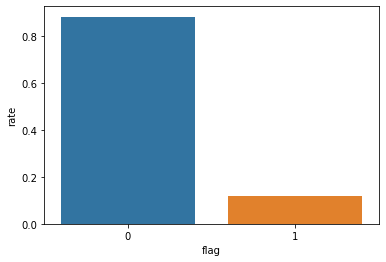

In [20]:
tmp = pd.DataFrame(pdd['coupon_ind'].value_counts(1)).reset_index().rename(columns={'index':'flag','coupon_ind':'rate'})
tmp
sns.barplot(x='flag', y='rate', data=tmp)

   ### 过去6个月优惠券使用情况

In [40]:
pdd['coupon_used_in_last6_month'].describe()

count    25033.000000
mean         2.779171
std          3.146620
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         55.000000
Name: coupon_used_in_last6_month, dtype: float64

C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='coupon_used_in_last6_month', ylabel='Density'>

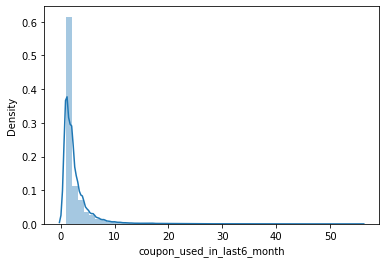

In [43]:
sns.distplot(pdd['coupon_used_in_last6_month'])

过去6个月优惠券使用数量集中在0-10次之间

   ### 过去1个月优惠券使用情况

In [35]:
pdd['coupon_used_in_last_month'].describe()

count    25033.000000
mean         0.289498
std          0.763161
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: coupon_used_in_last_month, dtype: float64

C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='coupon_used_in_last_month', ylabel='Density'>

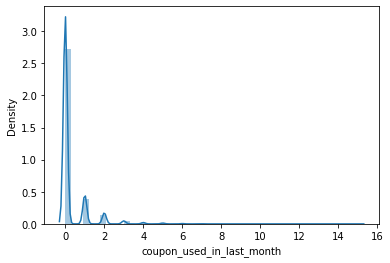

In [44]:
sns.distplot(pdd['coupon_used_in_last_month'])

过去1个月优惠券使用数量集中在0-2次之间

   ### 年龄的分布情况和不同年龄的使用优惠券情况

In [21]:
pdd['age'].describe()

count    25317.000000
mean        40.935379
std         10.634289
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

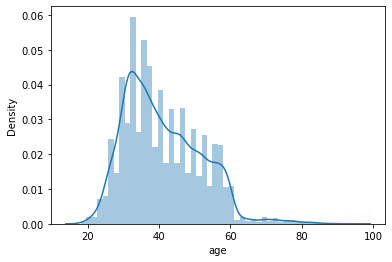

In [22]:
import seaborn as sns
sns.distplot(pdd['age'])

年龄主要分布在20-60岁之间
大于60岁的可能是异常值，要去除一下

<AxesSubplot:ylabel='age'>

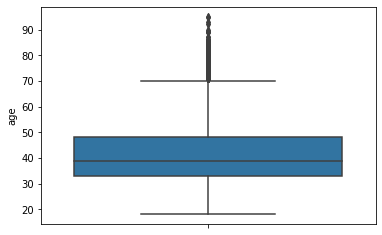

In [23]:
sns.boxplot(y='age', data=pdd)

In [24]:
# 规定大于75%+四分位差的1.5倍为异常值
newmax = pdd['age'].describe()['75%'] + 1.5*(pdd['age'].describe()['75%']-pdd['age'].describe()['25%']) 
print(newmax)
pdd[pdd['age']>newmax]['age'].count()

70.5


284

75%+四分位差的1.5倍为70.5，大于70.5的为异常值
大于70.5有284个数据

In [25]:
# 去除异常值
pdd = pdd[pdd['age']<=newmax]

In [29]:
pdd['age'].describe()

count    25033.000000
mean        40.528902
std          9.968850
min         18.000000
25%         32.000000
50%         39.000000
75%         48.000000
max         70.000000
Name: age, dtype: float64

C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

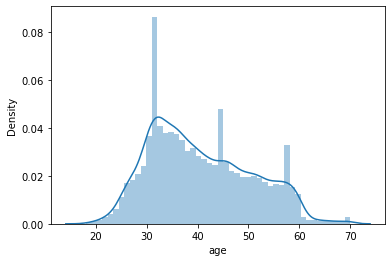

In [30]:
import seaborn as sns
sns.distplot(pdd['age'])

In [50]:
# 查看年龄和是否使用优惠券的关系
pdd.groupby('coupon_ind')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
coupon_ind,,,,,,,,
0,22202.0,40.569859,9.751967,18.0,33.0,39.0,48.0,70.0
1,2831.0,40.207700,11.526063,18.0,31.0,37.0,49.0,70.0


C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


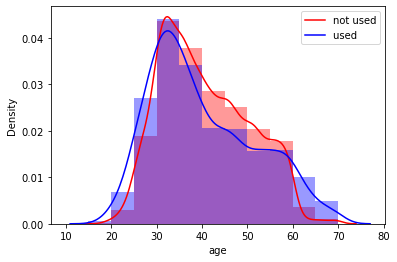

In [55]:
bins = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
sns.distplot(pdd[pdd['coupon_ind']==0]['age'], bins=bins, color='red')
sns.distplot(pdd[pdd['coupon_ind']==1]['age'], bins=bins, color='blue')
plt.legend(['not used','used '])

使用拼多多APP的用户年龄主要在在20-70之间
小于35岁和大于60岁的用户更倾向于使用优惠券
小于35的用户年轻掌握优惠券的使用方法
大于60的用户不一定知道怎么使用优惠券，不能下结论
而在35~60岁间的用户更倾向于不使用优惠券，可能是因为经济条件比较好，不在意优惠券

## 类别变量

   ### job职业的分布和不同职业用户的优惠券使用情况

In [45]:
pdd['job'].value_counts()

blue-collar      5455
management       5287
technician       4239
admin.           2906
services         2342
retired          1026
self-employed     881
entrepreneur      855
unemployed        701
housemaid         650
student           533
unknown           158
Name: job, dtype: int64

<AxesSubplot:xlabel='count', ylabel='job'>

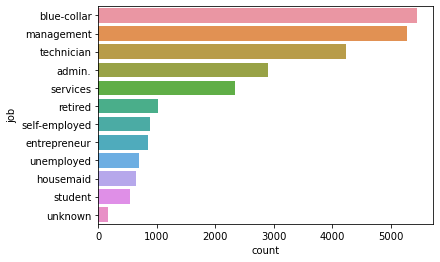

In [47]:
sns.countplot(y='job',data=pdd, order=pdd['job'].value_counts().sort_values(ascending=False).index)

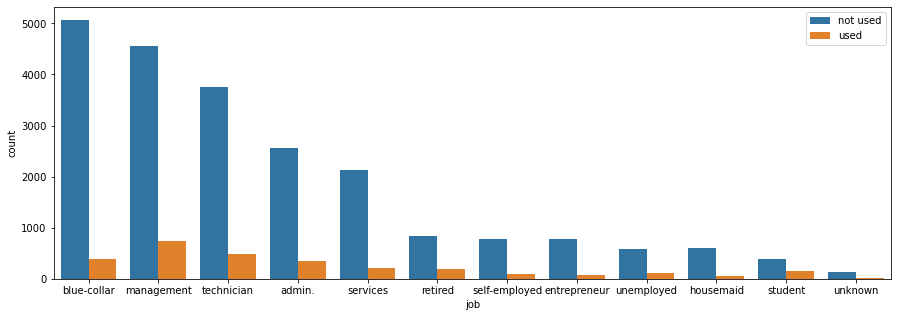

In [61]:
plt.figure(figsize=(15,5))
sns.countplot(x='job',data=pdd, hue='coupon_ind', order=pdd['job'].value_counts().sort_values(ascending=False).index)
plt.legend(['not used','used'])

In [59]:
tmp = pd.DataFrame(pdd.groupby(['job'])['coupon_ind'].value_counts(1))
tmp = tmp.rename(columns={'coupon_ind':'rate'}).reset_index()
tmp[tmp['coupon_ind']==1].sort_values(by='rate', ascending=False)

,job,coupon_ind,rate
17,student,1,0.268293
11,retired,1,0.178363
21,unemployed,1,0.162625
9,management,1,0.138453
1,admin.,1,0.116999
13,self-employed,1,0.116913
23,unknown,1,0.113924
19,technician,1,0.113234
15,services,1,0.090094
7,housemaid,1,0.081538


<AxesSubplot:xlabel='rate', ylabel='job'>

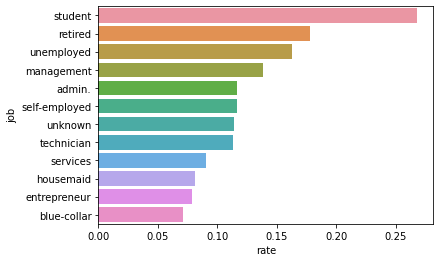

In [60]:
orderlist = tmp[tmp['coupon_ind']==1].sort_values(by='rate', ascending=False)['job'].tolist()
sns.barplot(y='job', x='rate', data=tmp[tmp['coupon_ind']==1], order=orderlist)

从上可以看出，在所有职业中，使用拼多多的blue-collar最多，其次是management, technician, admin, services
使用了优惠券的用户中，management的用户最多，其次是technician, blue-collar, admin, services
但是在各个职业群体中，优惠券使用率最高的是学生、退休人员、无业、管理人员、行政人员
可以适当合并类别，这样使得后续建模的时候减少参数的数量

 ### 不同婚姻状态的分布和不同婚姻状态的用户的优惠券使用情况

In [48]:
pdd['marital'].value_counts()

married     15035
single       7148
divorced     2850
Name: marital, dtype: int64

<AxesSubplot:xlabel='marital', ylabel='count'>

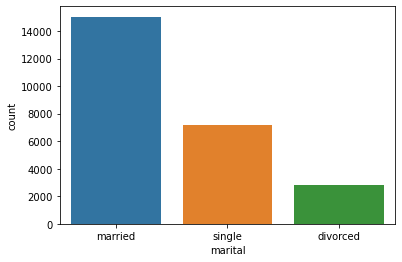

In [49]:
sns.countplot(x='marital',data=pdd, order=pdd['marital'].value_counts().sort_values(ascending=False).index)

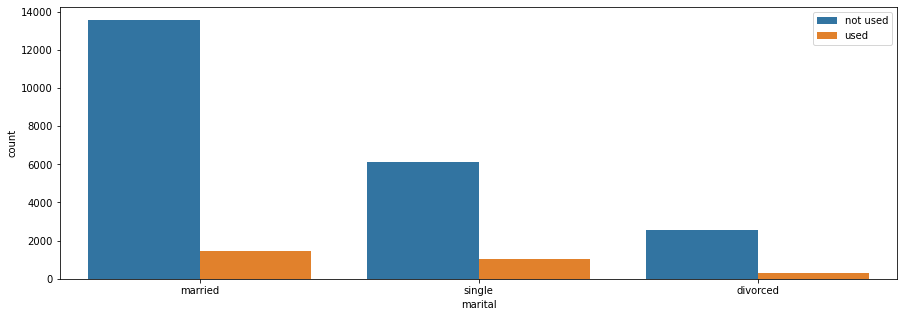

In [62]:
plt.figure(figsize=(15,5))
sns.countplot(x='marital',data=pdd, hue='coupon_ind', order=pdd['marital'].value_counts().sort_values(ascending=False).index)
plt.legend(['not used','used'])

In [63]:
tmp = pd.DataFrame(pdd.groupby(['marital'])['coupon_ind'].value_counts(1))
tmp = tmp.rename(columns={'coupon_ind':'rate'}).reset_index()
tmp[tmp['coupon_ind']==1].sort_values(by='rate', ascending=False)

,marital,coupon_ind,rate
5,single,1,0.146335
1,divorced,1,0.111228
3,married,1,0.097639


<AxesSubplot:xlabel='marital', ylabel='rate'>

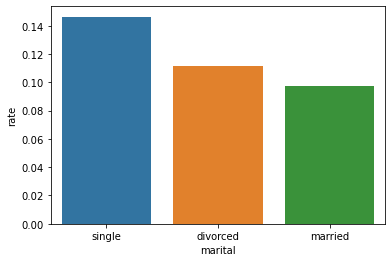

In [64]:
orderlist = tmp[tmp['coupon_ind']==1].sort_values(by='rate', ascending=False)['marital'].tolist()
sns.barplot(x='marital', y='rate', data=tmp[tmp['coupon_ind']==1], order=orderlist)

使用拼多多的已婚用户较多，其次是单身、离婚用户
单身用户的优惠券使用率最高，大约为14.6%

 ### 信用卡是否违约的用户的优惠券使用情况

In [65]:
pdd['default'].value_counts()

no     24586
yes      447
Name: default, dtype: int64

<AxesSubplot:xlabel='default', ylabel='count'>

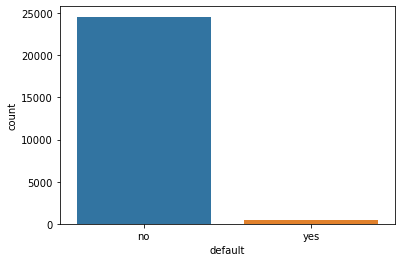

In [66]:
sns.countplot(x='default',data=pdd, order=pdd['default'].value_counts().sort_values(ascending=False).index)

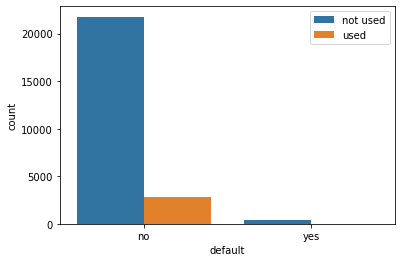

In [83]:
sns.countplot(x='default',data=pdd, hue='coupon_ind', order=pdd['default'].value_counts().sort_values(ascending=False).index)
plt.legend(['not used','used'])

In [68]:
tmp = pd.DataFrame(pdd.groupby(['default'])['coupon_ind'].value_counts(1))
tmp = tmp.rename(columns={'coupon_ind':'rate'}).reset_index()
tmp[tmp['coupon_ind']==1].sort_values(by='rate', ascending=False)

,default,coupon_ind,rate
1,no,1,0.114130
3,yes,1,0.055928


<AxesSubplot:xlabel='default', ylabel='rate'>

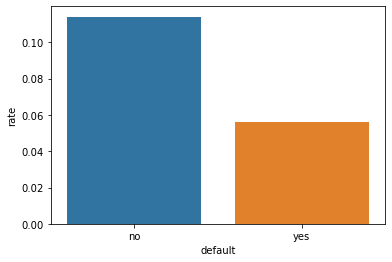

In [69]:
orderlist = tmp[tmp['coupon_ind']==1].sort_values(by='rate', ascending=False)['default'].tolist()
sns.barplot(x='default', y='rate', data=tmp[tmp['coupon_ind']==1], order=orderlist)

从上可以看出，信用卡违约的用户较少
信用卡未违约的用户使用优惠券的概率大约是11%
信用卡违约的用户使用优惠券的概率大约是5%

 ### 是否退货的用户的优惠券使用情况

In [72]:
pdd['returned'].value_counts()

yes    14014
no     11019
Name: returned, dtype: int64

<AxesSubplot:xlabel='returned', ylabel='count'>

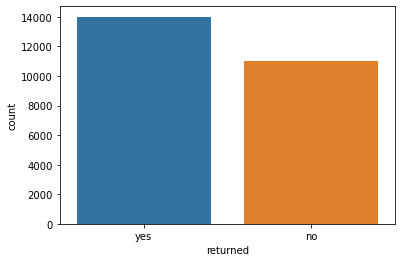

In [73]:
sns.countplot(x='returned',data=pdd, order=pdd['returned'].value_counts().sort_values(ascending=False).index)

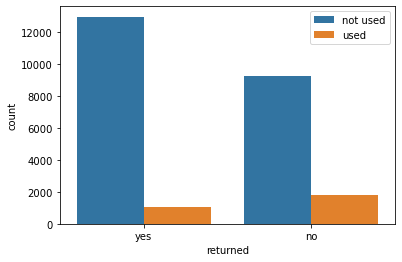

In [84]:
sns.countplot(x='returned',data=pdd, hue='coupon_ind', order=pdd['returned'].value_counts().sort_values(ascending=False).index)
plt.legend(['not used','used'])

In [75]:
tmp = pd.DataFrame(pdd.groupby(['returned'])['coupon_ind'].value_counts(1))
tmp = tmp.rename(columns={'coupon_ind':'rate'}).reset_index()
tmp[tmp['coupon_ind']==1].sort_values(by='rate', ascending=False)

,returned,coupon_ind,rate
1,no,1,0.161358
3,yes,1,0.075139


<AxesSubplot:xlabel='returned', ylabel='rate'>

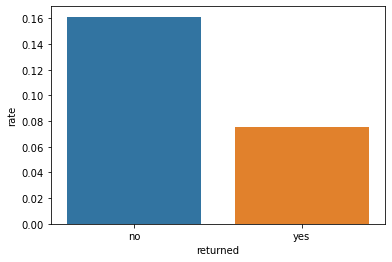

In [77]:
orderlist = tmp[tmp['coupon_ind']==1].sort_values(by='rate', ascending=False)['returned'].tolist()
sns.barplot(x='returned', y='rate', data=tmp[tmp['coupon_ind']==1], order=orderlist)

从上可以看出，拼多多用户发生退货的用户比较多
没有退货的用户使用优惠券的概率是16%
退货的用户使用优惠券的概率是7%
可以思考是不是用户没有使用优惠券发现买贵了才发生了退货行为呢？
提高优惠券的使用率是不是能降低退货率呢？

 ### 是否使用信用卡付款的用户的优惠券使用情况

In [78]:
pdd['loan'].value_counts()

no     20976
yes     4057
Name: loan, dtype: int64

<AxesSubplot:xlabel='loan', ylabel='count'>

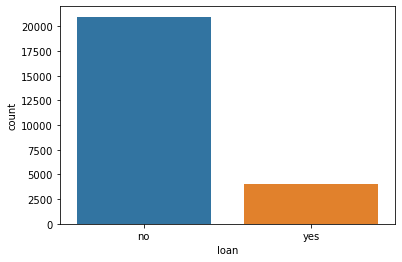

In [79]:
sns.countplot(x='loan',data=pdd, order=pdd['loan'].value_counts().sort_values(ascending=False).index)

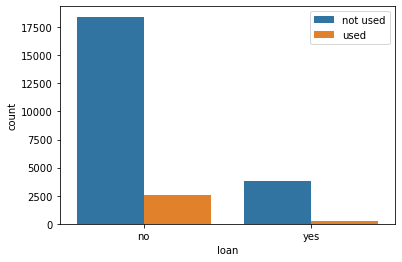

In [85]:
sns.countplot(x='loan',data=pdd, hue='coupon_ind', order=pdd['loan'].value_counts().sort_values(ascending=False).index)
plt.legend(['not used','used'])

In [81]:
tmp = pd.DataFrame(pdd.groupby(['loan'])['coupon_ind'].value_counts(1))
tmp = tmp.rename(columns={'coupon_ind':'rate'}).reset_index()
tmp[tmp['coupon_ind']==1].sort_values(by='rate', ascending=False)

,loan,coupon_ind,rate
1,no,1,0.121663
3,yes,1,0.068770


<AxesSubplot:xlabel='loan', ylabel='rate'>

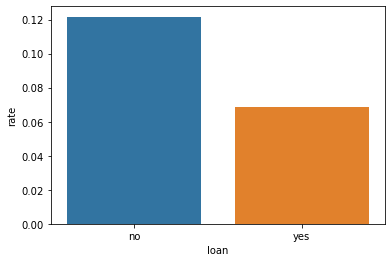

In [82]:
orderlist = tmp[tmp['coupon_ind']==1].sort_values(by='rate', ascending=False)['loan'].tolist()
sns.barplot(x='loan', y='rate', data=tmp[tmp['coupon_ind']==1], order=orderlist)

从上可以看出，拼多多的用户使用信用卡支付的比较少，大约六分之一
使用信用卡支付的用户使用优惠券的概率大约是7%
未使用信用卡支付的用户使用优惠券的概率大约是12%

# 模型建立和优化

 ## 数据预处理

  ### 数据分箱

In [86]:
#年龄分箱
pdd['age'].describe()

count    25033.000000
mean        40.528902
std          9.968850
min         18.000000
25%         32.000000
50%         39.000000
75%         48.000000
max         70.000000
Name: age, dtype: float64

In [87]:
bins = [0, 25, 45, 65, 100]
labels = ['<25', '25-45', '45-65', '>65']
pdd['age_clean'] = pd.cut(pdd['age'], bins, labels=labels, right=False)

<ipython-input-87-df0be5d7d19c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdd['age_clean'] = pd.cut(pdd['age'], bins, labels=labels, right=False)


In [88]:
pdd.head()

,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind,age_clean
ID,,,,,,,,,,
1,43,management,married,no,yes,no,2,0,0,25-45
2,42,technician,divorced,no,yes,no,1,1,0,25-45
3,47,admin.,married,no,yes,yes,2,0,0,45-65
4,28,management,single,no,yes,yes,2,0,0,25-45
5,42,technician,divorced,no,yes,no,5,0,0,25-45


In [89]:
#过去6个月优惠券使用情况分箱
pdd['coupon_used_in_last6_month'].describe()

count    25033.000000
mean         2.779171
std          3.146620
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         55.000000
Name: coupon_used_in_last6_month, dtype: float64

In [90]:
pdd['coupon_used_in_last6_month'].value_counts()

1     9685
2     6937
3     3064
4     1944
5      976
6      719
7      404
8      301
9      182
10     149
11     111
12      80
13      62
16      52
14      50
17      48
15      44
18      30
19      26
20      23
21      21
23      17
25      12
29      12
22      12
24      10
26       8
31       8
27       7
28       7
32       7
36       4
34       4
30       4
33       3
50       2
43       2
55       1
44       1
35       1
37       1
51       1
41       1
Name: coupon_used_in_last6_month, dtype: int64

In [ ]:
bins = [0, 6, 21, 42]
pdd['c6'] = pd.cut(pdd['coupon_used_in_last6_month'], bins, labels=['low', 'middle', 'high'])

In [91]:
#过去1个月优惠券使用情况分箱
pdd['coupon_used_in_last_month'].describe()

count    25033.000000
mean         0.289498
std          0.763161
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: coupon_used_in_last_month, dtype: float64

In [93]:
pdd['coupon_used_in_last_month'].value_counts()

0     20501
1      2876
2      1093
3       299
4       132
5        79
6        31
7        12
8         5
10        2
9         1
11        1
15        1
Name: coupon_used_in_last_month, dtype: int64

In [94]:
bins = [0, 1, 2, 3, 15]
labels = ['0', '1', '2', '>2']
pdd['c1'] = pd.cut(pdd['coupon_used_in_last_month'], bins, labels=labels, right=False)

<ipython-input-94-d68274b1d829>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdd['c1'] = pd.cut(pdd['coupon_used_in_last_month'], bins, labels=labels, right=False)


In [95]:
#职业减少类别
tmp = pd.DataFrame(pdd.groupby(['job'])['coupon_ind'].value_counts(1))
tmp = tmp.rename(columns={'coupon_ind':'rate'}).reset_index()
tmp[tmp['coupon_ind']==1].sort_values(by='rate', ascending=False)

,job,coupon_ind,rate
17,student,1,0.268293
11,retired,1,0.178363
21,unemployed,1,0.162625
9,management,1,0.138453
1,admin.,1,0.116999
13,self-employed,1,0.116913
23,unknown,1,0.113924
19,technician,1,0.113234
15,services,1,0.090094
7,housemaid,1,0.081538


<AxesSubplot:xlabel='rate', ylabel='job'>

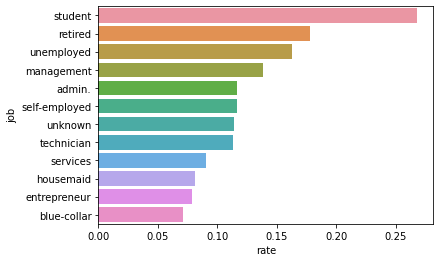

In [96]:
orderlist = tmp[tmp['coupon_ind']==1].sort_values(by='rate', ascending=False)['job'].tolist()
sns.barplot(y='job', x='rate', data=tmp[tmp['coupon_ind']==1], order=orderlist)

数据集包含的职业类型较多，为了方便后续建模，可以将相似的职业合并成一个类型
根据各个职业的优惠券使用率，初步将student,retired,unemployed合并为低收入群体，management,admin,self-employed,unknown,technician合并为中低收入群体，services,housemaid合并为中等收入群体，entrepreneur,blue-collar合并为高收入群体

In [99]:
def job_merge(job):
    if job=='student' or job=='retired' or job=='unemployed':
        return 'low'
    elif job=='management' or job=='admin.' or job=='self-employed' or job=='unknown' or job=='technician':
        return 'middle-low'
    elif job=='services' or job=='housemaid':
        return 'middle'
    elif job=='entrepreneur' or job=='blue-collar':
        return 'high'
pdd['job_clean'] = pdd['job'].apply(job_merge)
pdd.head()

<ipython-input-99-cd91e89afde2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdd['job_clean'] = pdd['job'].apply(job_merge)


,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind,age_clean,c1,job_clean
ID,,,,,,,,,,,,
1,43,management,married,no,yes,no,2,0,0,25-45,0,middle-low
2,42,technician,divorced,no,yes,no,1,1,0,25-45,1,middle-low
3,47,admin.,married,no,yes,yes,2,0,0,45-65,0,middle-low
4,28,management,single,no,yes,yes,2,0,0,25-45,0,middle-low
5,42,technician,divorced,no,yes,no,5,0,0,25-45,0,middle-low


  ### 哑变量处理

In [100]:
pdd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25033 entries, 1 to 25317
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   age                         25033 non-null  int64   
 1   job                         25033 non-null  object  
 2   marital                     25033 non-null  object  
 3   default                     25033 non-null  object  
 4   returned                    25033 non-null  object  
 5   loan                        25033 non-null  object  
 6   coupon_used_in_last6_month  25033 non-null  int64   
 7   coupon_used_in_last_month   25033 non-null  int64   
 8   coupon_ind                  25033 non-null  int64   
 9   age_clean                   25033 non-null  category
 10  c1                          25032 non-null  category
 11  job_clean                   25033 non-null  object  
dtypes: category(2), int64(4), object(6)
memory usage: 2.7+ MB


In [102]:
# drop掉ID,coupon_used_in_last_month, coupon_used_in_last6_month, job, age
pdd_clean = pdd.drop(['coupon_used_in_last_month', 'coupon_used_in_last6_month', 'job', 'age'], axis=1)

In [103]:
# 类别变量转成哑变量
pdd_clean = pd.get_dummies(pdd_clean, drop_first=True)

In [104]:
pdd_clean.head()

,coupon_ind,marital_married,marital_single,default_yes,returned_yes,loan_yes,age_clean_25-45,age_clean_45-65,age_clean_>65,c1_1,c1_2,c1_>2,job_clean_low,job_clean_middle,job_clean_middle-low
ID,,,,,,,,,,,,,,,
1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
3,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1
4,0,0,1,0,1,1,1,0,0,0,0,0,0,0,1
5,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1


In [275]:
pdd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25033 entries, 1 to 25317
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   coupon_ind            25033 non-null  int64
 1   marital_married       25033 non-null  uint8
 2   marital_single        25033 non-null  uint8
 3   default_yes           25033 non-null  uint8
 4   returned_yes          25033 non-null  uint8
 5   loan_yes              25033 non-null  uint8
 6   age_clean_25-45       25033 non-null  uint8
 7   age_clean_45-65       25033 non-null  uint8
 8   age_clean_>65         25033 non-null  uint8
 9   c1_1                  25033 non-null  uint8
 10  c1_2                  25033 non-null  uint8
 11  c1_>2                 25033 non-null  uint8
 12  job_clean_low         25033 non-null  uint8
 13  job_clean_middle      25033 non-null  uint8
 14  job_clean_middle-low  25033 non-null  uint8
dtypes: int64(1), uint8(14)
memory usage: 1.2 MB


  ### 相关系数分析

In [276]:
corr = pdd_clean.corr()[['coupon_ind']].sort_values('coupon_ind', ascending=False)
corr

,coupon_ind
coupon_ind,1.000000
c1_1,0.140320
job_clean_low,0.081167
c1_2,0.076783
age_clean_>65,0.069686
marital_single,0.066360
job_clean_middle-low,0.037838
c1_>2,0.025920
age_clean_25-45,-0.009942
age_clean_45-65,-0.016697


In [277]:
# 取出相关系数绝对值大于0.05的变量
import numpy as np
r=0.05
var = corr.where(np.abs(corr)>r).dropna(how='any').index.values
var

array(['coupon_ind', 'c1_1', 'job_clean_low', 'c1_2', 'age_clean_>65',
       'marital_single', 'marital_married', 'loan_yes', 'returned_yes'],
      dtype=object)

<AxesSubplot:>

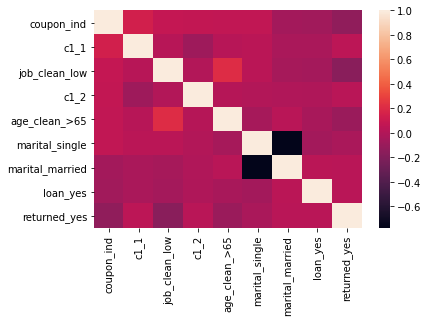

In [278]:
sns.heatmap(pdd_clean[var].corr())

 ## 模型建立

In [287]:
y = pdd_clean['coupon_ind']
var = var[1:]
x = pdd_clean[var]  # x变量就是上面取出来的和coupon_ind相关系数绝对值大于0.05的那几个变量

In [288]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [289]:
from sklearn import linear_model
lr = linear_model.LogisticRegression(random_state=7)

In [290]:
lr.fit(x_train, y_train)

LogisticRegression(random_state=7)

In [291]:
# 输出模型拟合的截距
lr.intercept_

array([-1.73549944])

In [292]:
# 输出模型拟合后各个变量的系数和概率比值
for var_name, coef, rate in zip(var, lr.coef_[0], np.exp(lr.coef_[0])):
    print('{}的系数：{:.4f}\t概率比值：{:.4f}'.format(var_name, coef, rate))

job_clean_low的系数：0.3448	概率比值：1.4118
c1_2的系数：0.9991	概率比值：2.7159
age_clean_>65的系数：1.0179	概率比值：2.7675
marital_single的系数：0.3083	概率比值：1.3611
marital_married的系数：-0.1377	概率比值：0.8714
loan_yes的系数：-0.5953	概率比值：0.5514
returned_yes的系数：-0.8016	概率比值：0.4486


低收入用户在这次活动使用优惠券的概率是其他用户的1.41倍；
最近一个月使用两次优惠券的用户在这次活动使用优惠券的概率是其他用户的2.71倍；
年龄大于65岁的用户在这次活动使用优惠券的概率是其他用户的2.76倍；
单身用户在这次活动使用优惠券的概率是其他用户的1.36倍；
已婚用户使用优惠券的概率是其他用户的0.87倍；
使用信用卡付款的用户使用优惠券的概率是不使用信用卡用户的0.55倍；
有退货行为的用户使用优惠券的概率是没有过退货行为用户的0.45倍。

 ## 模型评估

In [293]:
# 用list保存各个模型的各种指标值
model_name = []
train_accs = []
test_accs = []
f1_scores = []
precisions = []
recalls = []
AUCs = []

In [294]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

def evaluation_print(y_train, y_pred_train, y_test, y_pred_test):
    # 训练集的准确率
    train_acc = metrics.accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)
    train_acc

    def confusion_matrix_plot(y_true, y_pred):
        data = metrics.confusion_matrix(y_true, y_pred)
        sns.heatmap(data, annot=True, annot_kws={'size':20, 'weight':'bold'}, cbar=False, fmt='.20g')
        plt.ylabel('True Label')
        plt.xlabel('Predict Label')
        plt.title('Confusion Matrix')

    # 训练集的混淆矩阵
    # confusion_matrix_plot(y_train, y_pred_train)

    # 测试集的准确率
    test_acc = metrics.accuracy_score(y_test, y_pred_test)
    test_accs.append(test_acc)

    # 测试集的混淆矩阵
    # confusion_matrix_plot(y_test, y_pred_test)

    # 测试集的precision
    test_precision = metrics.precision_score(y_test, y_pred_test)
    precisions.append(test_precision)


    # 测试集的recall
    test_recall = metrics.recall_score(y_test, y_pred_test)
    recalls.append(test_recall)


    # 测试集的f1-score
    test_f1 = metrics.f1_score(y_test, y_pred_test)
    f1_scores.append(test_f1)
     # ROC/AUC评估-测试集
    fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, y_pred_test, pos_label=1)
    test_auc = metrics.auc(fpr2,tpr2)
    AUCs.append(test_auc)
    
    # 训练集的分类报告
    print('训练集的分类报告：')
    print(classification_report(y_train, y_pred_train))

    # 测试集的分类报告
    print('测试集的分类报告：')
    print(classification_report(y_test, y_pred_test))

    # 绘制ROC-测试集
    plt.plot(fpr2, tpr2, marker='o')
    plt.title('测试集ROC')
    plt.show()

    # 输出所有评估指标的值
    print('train_acc\t test_acc\t precision\t recall\t\t f1-score\t AUC')
    print('{:.4f}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}'.format(train_acc, test_acc, test_precision, test_recall, test_f1, test_auc))

In [295]:
# 基于模型的结果，对训练集和测试集中的x的真实值预测对应的y
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

In [296]:
# 搭建训练集混淆矩阵
import sklearn.metrics as metrics 
metrics.confusion_matrix(y_train,y_pred_train)

array([[15530,     6],
       [ 1982,     5]], dtype=int64)

In [297]:
# 计算训练集准确率
metrics.accuracy_score(y_train,y_pred_train)

0.88654910688809

In [298]:
# 搭建测试集混淆矩阵
metrics.confusion_matrix(y_test,y_pred_test)

array([[6662,    4],
       [ 843,    1]], dtype=int64)

In [299]:
# 计算测试集准确率
metrics.accuracy_score(y_test,y_pred_test)

0.8872170439414114

训练集的分类报告：
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     15536
           1       0.45      0.00      0.01      1987

    accuracy                           0.89     17523
   macro avg       0.67      0.50      0.47     17523
weighted avg       0.84      0.89      0.83     17523

测试集的分类报告：
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6666
           1       0.20      0.00      0.00       844

    accuracy                           0.89      7510
   macro avg       0.54      0.50      0.47      7510
weighted avg       0.81      0.89      0.83      7510



C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35797 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38598 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 35797 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201

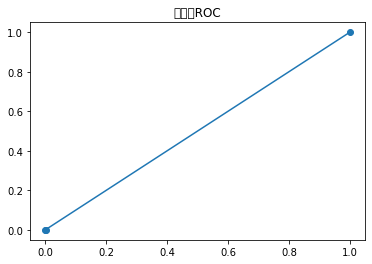

train_acc	 test_acc	 precision	 recall		 f1-score	 AUC
0.8865		0.8872		0.2000		0.0012		0.0024		0.5003


In [300]:
model_name.append('AddVariable')
evaluation_print(y_train, y_pred_train, y_test, y_pred_test)

AUC接近0.5，说明随机性太强。这是因为原始数据中不使用优惠券的认识比使用优惠券的人数多很多，需要考虑数据不均衡性。需要优化

发现训练集的准确率为0.8865，测试集的准确率为0.8872， 可以看到测试集中共有844人实际使用了优惠券，但预测结果中只有1人使用了优惠券，说明查全率偏低，模型效果不是很理想，需要进一步优化。

优化方向： 
1，调整参数，可以将测试集比例从0.3调整至0.5； 
2，调整变量，可以选择与更多的变量放入模型； 
3，数据处理，离群值处理，数据分组，如对年龄进行分组。
4，改善数据不平衡
RandomUnderSampler 随机下采样
RandomOverSampler 随机上采样
SMOTE 合成上采样
SMOTEC 合成上采样
BorderlineSMOTE 合成上采样
RENN 下采样
NearMiss 下采样
SMOTEENN 上采样+下采样
SMOTETomek 上采样+下采样

 ## 模型优化

  ### 调整参数

原始模型中test_size=0.3，现在将其改为0.5，其余不变
调整后的AUC几乎没有变化，不予采用


  ### 添加变量

In [301]:
# 把所有变量都放进模型
x = pdd_clean.drop('coupon_ind', axis=1)
y = pdd_clean['coupon_ind']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [302]:
lr.fit(x_train, y_train)

LogisticRegression(random_state=7)

In [303]:
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

训练集的分类报告：
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     15536
           1       0.42      0.02      0.03      1987

    accuracy                           0.89     17523
   macro avg       0.66      0.51      0.48     17523
weighted avg       0.84      0.89      0.84     17523

测试集的分类报告：
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6666
           1       0.43      0.02      0.03       844

    accuracy                           0.89      7510
   macro avg       0.66      0.51      0.48      7510
weighted avg       0.84      0.89      0.84      7510



C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35797 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38598 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 35797 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201

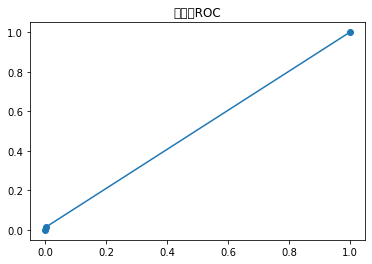

train_acc	 test_acc	 precision	 recall		 f1-score	 AUC
0.8860		0.8871		0.4333		0.0154		0.0297		0.5064


In [304]:
model_name.append('AddVariable')
evaluation_print(y_train, y_pred_train, y_test, y_pred_test)

并没有明显提升，不予采用

  ### 更改损失函数的类别权重
  更改权重就是针对不同类别的数据设置不同的分错代价，即提高少数类分错的代价或降低多数类分错的代价，最终使各类别平衡。
  常用的机器学习训练方法中，很多都提供了权重设置参数class_weight，可以手动设置该参数，但一般情况下只需要将其设置为balanced即可

训练集的分类报告：
              precision    recall  f1-score   support

           0       0.93      0.60      0.73     15536
           1       0.17      0.64      0.27      1987

    accuracy                           0.60     17523
   macro avg       0.55      0.62      0.50     17523
weighted avg       0.84      0.60      0.68     17523

测试集的分类报告：
              precision    recall  f1-score   support

           0       0.93      0.61      0.73      6666
           1       0.17      0.63      0.27       844

    accuracy                           0.61      7510
   macro avg       0.55      0.62      0.50      7510
weighted avg       0.84      0.61      0.68      7510



C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35797 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38598 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 35797 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201

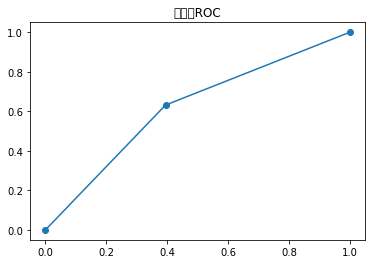

train_acc	 test_acc	 precision	 recall		 f1-score	 AUC
0.6040		0.6084		0.1685		0.6315		0.2660		0.6185


In [305]:
# x,y恢复到原始模型的变量
x = pdd_clean[var]
y = pdd_clean['coupon_ind']

lr = linear_model.LogisticRegression(random_state=7, class_weight='balanced')  
# 数据集分割7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# 模型拟合
lr.fit(x_train, y_train)

# 模型预测
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

model_name.append('Balanced')
evaluation_print(y_train, y_pred_train, y_test, y_pred_test)

AUC从0.5上升为0.61，稍微有一定的优化

  ### 改善数据不平衡

随机的采样
 RandomUnderSampler 随机下采样
 RandomOverSampler 随机上采样
改进的采样
 上采样
   SMOTE
   ADASYN
   BorderlineSMOTE
 下采样
   RENN
   NearMiss
组合采样
  SMOTEENN
  SMOTETomek

RandomUnderSampler 随机下采样

In [306]:
lr = linear_model.LogisticRegression(random_state=7)

训练集的分类报告：
              precision    recall  f1-score   support

           0       0.63      0.60      0.62      1987
           1       0.62      0.64      0.63      1987

    accuracy                           0.62      3974
   macro avg       0.62      0.62      0.62      3974
weighted avg       0.62      0.62      0.62      3974

测试集的分类报告：
              precision    recall  f1-score   support

           0       0.93      0.61      0.73      6666
           1       0.17      0.63      0.27       844

    accuracy                           0.61      7510
   macro avg       0.55      0.62      0.50      7510
weighted avg       0.84      0.61      0.68      7510



C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35797 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38598 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 35797 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201

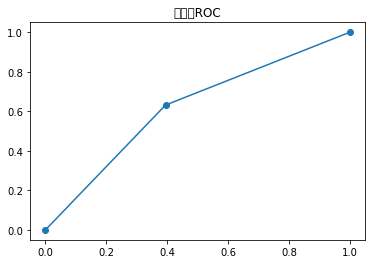

train_acc	 test_acc	 precision	 recall		 f1-score	 AUC
0.6246		0.6084		0.1685		0.6315		0.2660		0.6185


In [307]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)


# 数据集分割7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
x_train, y_train = rus.fit_resample(x_train, y_train)

# 模型拟合
lr.fit(x_train, y_train)

# 模型预测
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

model_name.append('RandomUnderSampler')
evaluation_print(y_train, y_pred_train, y_test, y_pred_test)

RandomOverSampler 随机上采样

训练集的分类报告：
              precision    recall  f1-score   support

           0       0.63      0.60      0.61     15536
           1       0.62      0.65      0.63     15536

    accuracy                           0.62     31072
   macro avg       0.62      0.62      0.62     31072
weighted avg       0.62      0.62      0.62     31072

测试集的分类报告：
              precision    recall  f1-score   support

           0       0.93      0.61      0.73      6666
           1       0.17      0.63      0.27       844

    accuracy                           0.61      7510
   macro avg       0.55      0.62      0.50      7510
weighted avg       0.84      0.61      0.68      7510



C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35797 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38598 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 35797 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201

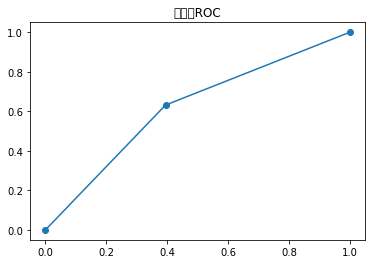

train_acc	 test_acc	 precision	 recall		 f1-score	 AUC
0.6227		0.6084		0.1685		0.6315		0.2660		0.6185


In [308]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

# 数据集分割7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
x_train, y_train = ros.fit_resample(x_train, y_train)

# 模型拟合
lr.fit(x_train, y_train)

# 模型预测
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

model_name.append('RandomOverSampler')
evaluation_print(y_train, y_pred_train, y_test, y_pred_test)

AUC=0.62

SMOTE 上采样

训练集的分类报告：
              precision    recall  f1-score   support

           0       0.57      0.64      0.61     15536
           1       0.59      0.52      0.55     15536

    accuracy                           0.58     31072
   macro avg       0.58      0.58      0.58     31072
weighted avg       0.58      0.58      0.58     31072

测试集的分类报告：
              precision    recall  f1-score   support

           0       0.91      0.64      0.75      6666
           1       0.15      0.50      0.23       844

    accuracy                           0.63      7510
   macro avg       0.53      0.57      0.49      7510
weighted avg       0.83      0.63      0.70      7510



C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35797 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38598 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 35797 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201

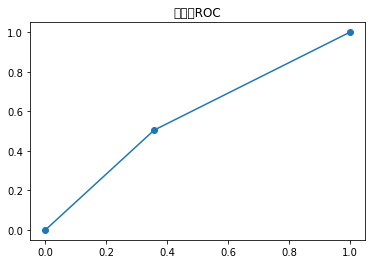

train_acc	 test_acc	 precision	 recall		 f1-score	 AUC
0.5809		0.6274		0.1518		0.5047		0.2334		0.5739


In [309]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)


# 数据集分割7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
x_train, y_train = smote.fit_resample(x_train, y_train)

# 模型拟合
lr.fit(x_train, y_train)

# 模型预测
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

model_name.append('SMOTE')
evaluation_print(y_train, y_pred_train, y_test, y_pred_test)

AUC=0.56,舍弃

ADASYN上采样

训练集的分类报告：
              precision    recall  f1-score   support

           0       0.55      0.62      0.58     15536
           1       0.56      0.49      0.52     15568

    accuracy                           0.56     31104
   macro avg       0.56      0.56      0.55     31104
weighted avg       0.56      0.56      0.55     31104

测试集的分类报告：
              precision    recall  f1-score   support

           0       0.91      0.62      0.74      6666
           1       0.15      0.52      0.23       844

    accuracy                           0.61      7510
   macro avg       0.53      0.57      0.48      7510
weighted avg       0.82      0.61      0.68      7510



C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35797 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38598 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 35797 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201

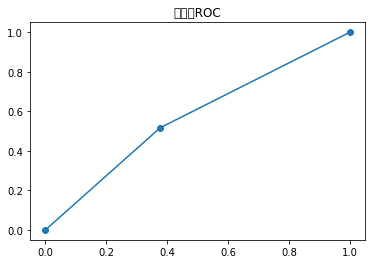

train_acc	 test_acc	 precision	 recall		 f1-score	 AUC
0.5551		0.6111		0.1478		0.5166		0.2299		0.5698


In [310]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)

# 数据集分割7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
x_train, y_train = adasyn.fit_resample(x_train, y_train)

# 模型拟合
lr.fit(x_train, y_train)

# 模型预测
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

model_name.append('ADASYN')
evaluation_print(y_train, y_pred_train, y_test, y_pred_test)

AUC=0.55,舍弃

BorderlineSMOTE上采样

训练集的分类报告：
              precision    recall  f1-score   support

           0       0.62      0.64      0.63     15536
           1       0.63      0.60      0.61     15536

    accuracy                           0.62     31072
   macro avg       0.62      0.62      0.62     31072
weighted avg       0.62      0.62      0.62     31072

测试集的分类报告：
              precision    recall  f1-score   support

           0       0.91      0.64      0.75      6666
           1       0.15      0.50      0.23       844

    accuracy                           0.63      7510
   macro avg       0.53      0.57      0.49      7510
weighted avg       0.83      0.63      0.70      7510



C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35797 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38598 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 35797 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201

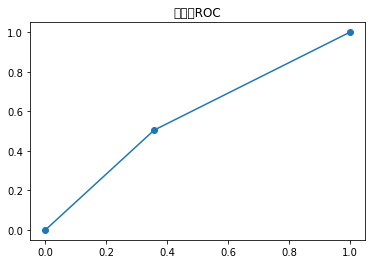

train_acc	 test_acc	 precision	 recall		 f1-score	 AUC
0.6215		0.6274		0.1518		0.5047		0.2334		0.5739


In [311]:
from imblearn.over_sampling import BorderlineSMOTE
bsmote = BorderlineSMOTE(random_state=42)


# 数据集分割7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
x_train, y_train = bsmote.fit_resample(x_train, y_train)

# 模型拟合
lr.fit(x_train, y_train)

# 模型预测
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

model_name.append('BorderlineSMOTE')
evaluation_print(y_train, y_pred_train, y_test, y_pred_test)

AUC=0.60,舍弃

RENN下采样

训练集的分类报告：
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      8746
           1       0.98      0.59      0.73      1987

    accuracy                           0.92     10733
   macro avg       0.95      0.79      0.84     10733
weighted avg       0.93      0.92      0.91     10733

测试集的分类报告：
              precision    recall  f1-score   support

           0       0.92      0.65      0.77      6666
           1       0.17      0.58      0.27       844

    accuracy                           0.65      7510
   macro avg       0.55      0.62      0.52      7510
weighted avg       0.84      0.65      0.71      7510



C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35797 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38598 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 35797 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201

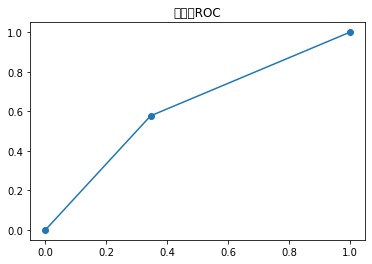

train_acc	 test_acc	 precision	 recall		 f1-score	 AUC
0.9213		0.6458		0.1746		0.5770		0.2680		0.6158


In [312]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
renn = RepeatedEditedNearestNeighbours()


# 数据集分割7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
x_train, y_train = renn.fit_resample(x_train, y_train)

# 模型拟合
lr.fit(x_train, y_train)

# 模型预测
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

model_name.append('RENN')
evaluation_print(y_train, y_pred_train, y_test, y_pred_test)

AUC=0.61,舍弃

NearMiss下采样

训练集的分类报告：
              precision    recall  f1-score   support

           0       0.63      0.59      0.61      1987
           1       0.61      0.65      0.63      1987

    accuracy                           0.62      3974
   macro avg       0.62      0.62      0.62      3974
weighted avg       0.62      0.62      0.62      3974

测试集的分类报告：
              precision    recall  f1-score   support

           0       0.93      0.60      0.73      6666
           1       0.17      0.63      0.26       844

    accuracy                           0.60      7510
   macro avg       0.55      0.62      0.50      7510
weighted avg       0.84      0.60      0.68      7510



C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35797 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38598 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 35797 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201

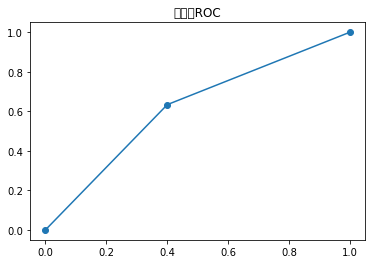

train_acc	 test_acc	 precision	 recall		 f1-score	 AUC
0.6198		0.6033		0.1669		0.6339		0.2643		0.6167


In [313]:
from imblearn.under_sampling import NearMiss 
nm = NearMiss()


# 数据集分割7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
x_train, y_train = nm.fit_resample(x_train, y_train)

# 模型拟合
lr.fit(x_train, y_train)

# 模型预测
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

model_name.append('NearMiss')
evaluation_print(y_train, y_pred_train, y_test, y_pred_test)

AUC=0.62,舍弃

SMOTEENN组合采样

训练集的分类报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8507
           1       1.00      0.96      0.98       125

    accuracy                           1.00      8632
   macro avg       1.00      0.98      0.99      8632
weighted avg       1.00      1.00      1.00      8632

测试集的分类报告：
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6666
           1       0.00      0.00      0.00       844

    accuracy                           0.89      7510
   macro avg       0.44      0.50      0.47      7510
weighted avg       0.79      0.89      0.83      7510



C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\s

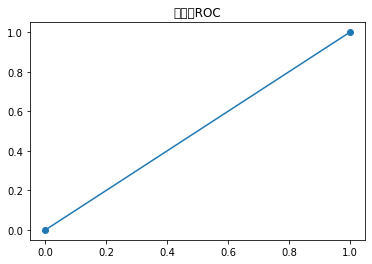

train_acc	 test_acc	 precision	 recall		 f1-score	 AUC
0.9994		0.8876		0.0000		0.0000		0.0000		0.5000


In [314]:
from imblearn.combine import SMOTEENN
smoteen = SMOTEENN(random_state=42)


# 数据集分割7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
x_train, y_train = smoteen.fit_resample(x_train, y_train)

# 模型拟合
lr.fit(x_train, y_train)

# 模型预测
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

model_name.append('SMOTEENN')
evaluation_print(y_train, y_pred_train, y_test, y_pred_test)

AUC=0.50,舍弃

SMOTETomek组合采样

训练集的分类报告：
              precision    recall  f1-score   support

           0       0.57      0.64      0.61     15536
           1       0.59      0.52      0.55     15536

    accuracy                           0.58     31072
   macro avg       0.58      0.58      0.58     31072
weighted avg       0.58      0.58      0.58     31072

测试集的分类报告：
              precision    recall  f1-score   support

           0       0.91      0.64      0.75      6666
           1       0.15      0.50      0.23       844

    accuracy                           0.63      7510
   macro avg       0.53      0.57      0.49      7510
weighted avg       0.83      0.63      0.70      7510



C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35797 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38598 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 35797 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\GaoYi\anaconda\envs\PDD\lib\site-packages\matplotlib\backends\backend_agg.py:201

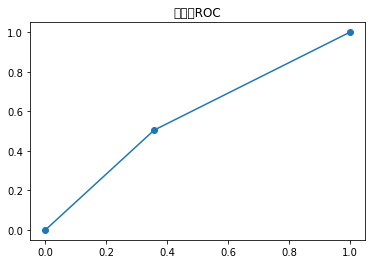

train_acc	 test_acc	 precision	 recall		 f1-score	 AUC
0.5809		0.6274		0.1518		0.5047		0.2334		0.5739


In [315]:
from imblearn.combine import SMOTETomek
smotet = SMOTETomek(random_state=42)


# 数据集分割7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
x_train, y_train = smotet.fit_resample(x_train, y_train)

# 模型拟合
lr.fit(x_train, y_train)

# 模型预测
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

model_name.append('SMOTETomek')
evaluation_print(y_train, y_pred_train, y_test, y_pred_test)

AUC=0.56,舍弃

最终模型

In [316]:
len(test_accs)

12

In [317]:
models_evaluation = pd.DataFrame({'method':model_name, 'train_acc':train_accs, 'test_acc':test_accs, 'precision':precisions,  'recall': recalls, 'f1_score':f1_scores, 'AUC':AUCs})
models_evaluation

,method,train_acc,test_acc,precision,recall,f1_score,AUC
0,AddVariable,0.886549,0.887217,0.200000,0.001185,0.002356,0.500292
1,AddVariable,0.885978,0.887084,0.433333,0.015403,0.029748,0.506426
2,Balanced,0.604006,0.608389,0.168511,0.631517,0.266034,0.618489
3,RandomUnderSampler,0.624560,0.608389,0.168511,0.631517,0.266034,0.618489
4,RandomOverSampler,0.622683,0.608389,0.168511,0.631517,0.266034,0.618489
5,SMOTE,0.580941,0.627430,0.151818,0.504739,0.233425,0.573852
6,ADASYN,0.555073,0.611052,0.147847,0.516588,0.229897,0.569800
7,BorderlineSMOTE,0.621492,0.627430,0.151818,0.504739,0.233425,0.573852
8,RENN,0.921271,0.645806,0.174552,0.577014,0.268024,0.615765
9,NearMiss,0.619779,0.603329,0.166927,0.633886,0.264263,0.616673


Text(0.5, 6.800000000000011, 'method')

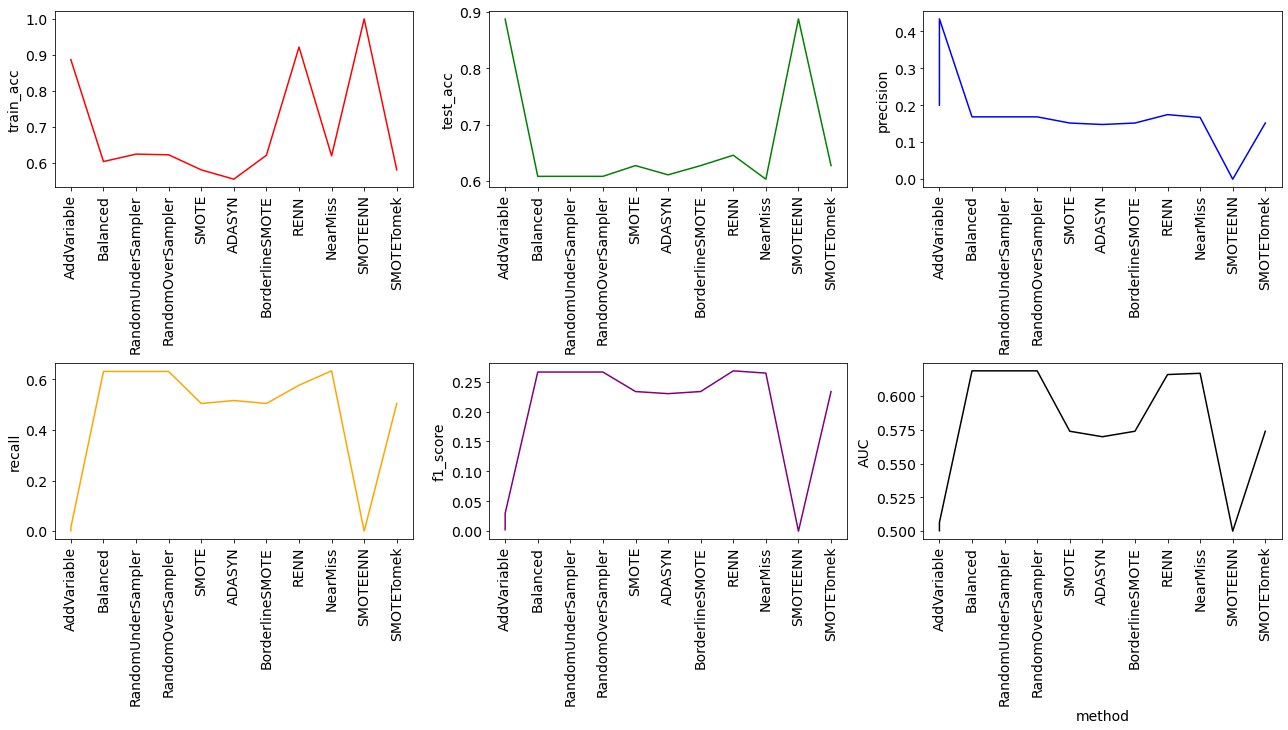

In [318]:
plt.figure(figsize=(18, 10))
colors = ['r','g', 'b', 'orange', 'purple', 'black']
cols = models_evaluation.columns.values
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.plot(models_evaluation[cols[0]], models_evaluation[cols[i+1]], colors[i])
    plt.tick_params(labelsize=14)
    plt.ylabel(cols[i+1], size=14)
    plt.xticks(rotation=90)
    plt.tight_layout(h_pad=1)
plt.xlabel(cols[0], size=14)

经过上面多种改善数据不平衡方法的尝试，大部分方法都对原模型在精确率、召回率、f1-score有了不同程度的提升
综合下来，选择各方面都较出色的更改损失函数的类别权重的方法

In [319]:
lr = linear_model.LogisticRegression(random_state=7, class_weight='balanced')  
# 数据集分割7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# 模型拟合
lr.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', random_state=7)

In [320]:
# 输出模型拟合后各个变量的系数和概率比值
for var_name, coef, rate in zip(var, lr.coef_[0], np.exp(lr.coef_[0])):
    print('{}的系数：{:.4f}\t概率比值：{:.4f}'.format(var_name, coef, rate))

job_clean_low的系数：0.3023	概率比值：1.3530
c1_2的系数：0.9412	概率比值：2.5630
age_clean_>65的系数：1.1283	概率比值：3.0903
marital_single的系数：0.2777	概率比值：1.3201
marital_married的系数：-0.1728	概率比值：0.8413
loan_yes的系数：-0.5411	概率比值：0.5821
returned_yes的系数：-0.7694	概率比值：0.4633


c1_2的系数解读：
在前一个月使用了2次优惠券的用户在本次活动中使用优惠券的概率是其他用户2.56倍。
同理：
低收入用户使用优惠券的概率是其他用户的1.35倍；
年龄大于65岁的用户使用优惠券的概率是其他用户的3.09倍；
单身用户使用优惠券概率是其他用户的1.3倍；
已婚用户使用优惠券的概率是其他用户的0.83倍；
使用信用卡付款的用户使用优惠券的概率是不使用信用卡用户的0.6倍；
有退货行为的用户使用优惠券的概率是没有过退货行为用户的0.5倍。

  ### 模型解读

（1）使用拼多多APP的用户年龄主要在在20-70之间；
小于35岁和大于60岁的用户更倾向于使用优惠券；
而在35~60岁间的用户更倾向于不使用优惠券；
小于35岁的用户更倾向于使用优惠券的原因是比较好理解的，因为年轻用户对APP的使用更为熟悉，更容易掌握优惠券的用法，而大于60岁的用户由于数量比较少，是否能直接得出他们更倾向于使用优惠券这一结论是不太靠谱的；
而35岁到60岁之间的用户随着年龄增长用户量也随之减少，不倾向于使用优惠券的原因可能是不清楚APP推出的优惠券活动，或者是因为经济能力比较好而无需费心使用优惠券。
（2）用户过去6个月优惠券使用数量大部分是0-10次；
用户过去1个月优惠券使用数量大部分少于2次。
（3）在所有职业中，蓝领用户最多，其次是管理人员, 技术人员, 行政人员, 服务行业人员；
使用了优惠券的用户中，管理人员最多，其次是技术人员, 蓝领用户, 行政人员, 服务行业人员；
但是在各个职业群体中，优惠券使用率最高的是学生、退休人员、无业、管理人员、行政人员。
（4）在所有用户中，已婚用户数量最多；
单身用户的优惠券使用率最高（14.6%）。
（5）只有少数用户信用卡违约；
没有信用卡违约的用户的优惠券使用率为11.4%。
（6）退货的用户较多；
未退货的用户使用优惠券使用率（16.1%）比退货的用户（7.5%）要高。
（7）大部分用户不使用信用卡付款；
不使用信用卡付款的用户的优惠券使用率（12.2%）比使用信用卡付款（6.9%）的高。
（8）在前一个月使用了2次优惠券的用户在本次活动中使用优惠券的概率是其他用户2.56倍；
低收入用户使用优惠券的概率是其他用户的1.35倍；
年龄大于65岁的用户使用优惠券的概率是其他用户的3.09倍；
单身用户使用优惠券概率是其他用户的1.3倍；
已婚用户使用优惠券的概率是其他用户的0.83倍；
使用信用卡付款的用户使用优惠券的概率是不使用信用卡用户的0.6倍；
有退货行为的用户使用优惠券的概率是没有过退货行为用户的0.5倍。

# 业务建议

（1）持续关注年轻人（小于35岁）和老年人（大于60岁）用户的使用优惠券情况，保持这部分群体的优惠券使用率；
（2）低收入群体，包括学生、老人、无业人员往往更倾向于使用优惠券，可以向这部分人投放更多优惠券；
（3）老年人、单身用户、不使用信用卡付款、没有过退货行为的用户比他们相反群体的用户的优惠券使用概率要高，可以向这部分人投放更多优惠券；
（4）中低收入群体是APP的主要使用群体，要想办法提高他们的优惠券使用率。

# 项目总结

这个项目让我体验到了从数据清洗-->数据探索-->建模预测-->模型优化-->得出业务结论的完整流程，受益匪浅。其中让我感触最深的是数据探索和模型优化这两个环节，如何从各个变量中发掘他们之间的关系，使用哪种可视化图表展示这种关系，这都是一个需要大量练习才能熟练掌握的过程，而模型优化则涉及到机器学习领域甚至是更高深的数学知识，这也促使我去了解各种机器学习模型的应用场景，以及更新的模型方法。但这次项目也有不足的地方，比如业务建议这一块，由于我对业务这块了解不多，因此给出的建议可能会比较笼统而不具体，今后还要在这方面多多积累。
